# Traitement de données, 2023, TD3

Ceci est un notebook python, qui va être utilisé pour le TD d'ajourd'hui. Il se trouve sur Google Colab, pour être facile à partager. Attention : Vous devriez pouvoir l'éditer, mais tant que vous ne l'avez pas téléchargé ou copié, aucune de vos modifications ne seront sauvées.

Pour ajouter vos solutions aux questions vous pouvez soit

Créer une copie de ce notebook sur votre propre compte Google (Fichier>Sauvegarder un copie sur Drive).
Télécharger le notebook (Fichier>Télécharger>.ipynb) et l'éditer/executer sur jupyter lab/notebook.
Télécharger le script python correspondant (Fichier>Télécharger>.py), l'éditer avec un éditeur de texte/code local et l'executer avec l'interpreteur local (python(3)), possiblement en utilisant un environement virtuel conda (ou tout faire dans un IDE).

# Intégration

## Données de MusicBrainz

MusicBrainz est une vaste base de données musical en ligne. Elle contient des informations sur les musiciens, les albums, les chansons, leur localisation, etc. L'ensemble des données de MusicBrainz est disponible au travers d'une [API](https://musicbrainz.org/doc/MusicBrainz_API).

On s'intéresse ici aux musiciens de Nancy. Pour récupérer des informations sur les relations entre types d'objets, on va utiliser la fonction "browse" de l'API de MusicBrainz.

Comme expliqué dans la documentation de l'API, sachant que l'URL de base de l'API est https://musicbrainz.org/ws/2/, une requete de type browse prend la forme
```
 /<RESULT_ENTITY_TYPE>?<BROWSING_ENTITY_TYPE>=<MBID>&limit=<LIMIT>&offset=<OFFSET>&inc=<INC>
```

Ici, on s'interesse aux artistes localisés à Nancy, donc :
* RESULT_ENTYT_TYPE est `artist`
* BROWSING_ENTITY_TYPE est `area`
* MBID est l'identifiant de Nancy dans MusicBrainz, i.e. `2b7c4074-dded-4703-a7de-e1d045c34b5c`

On voudra aussi que l'information sur le genre de musique, si disponible, soit inclu dans le résultat. Donc on mettra la valeur `genres` pour INC.

On veut obtenir un maximum de résultats, donc on mettra `100` pour LIMIT, qui est le nombre maximum de résultats que MusicBrainz peut renvoyer.

On laissera OFFSET à `0` pour le moment.

### Simple requete

On commence par utiliser la librairie `requests` de python pour appeller l'API de MusicBrainz avec ces paramètres et afficher le resultat :
```
r = requests.get(...)
print(r.text)
```

### Résultat en JSON
MusicBrainz, par default, renvoie du XML. Pour lui demander de renvoyer du JSON à la place, il faut utiliser l'entête `Accept` dans la requête HTTP realisée par `requests` et lui donner la valeur `application/json`. Pour cela, utlisez l'argument `headers` de la function `get` avec comme valeur le dictionnaire :
```
{"Accept": "application/json"}
```
Le resultat de la requête (`r.text`) contient maintenant du JSON.

### Créer la DataFrame

La fonction `r.json()` de la requête créée renvoit un objet (dictionnaire) python créé à partir du résultat de la requête en JSON. L'attribut `"artists"` de ce dictionnaire contient (normalement) la liste des artistes connus de MusicBrainz qui sont localisés à Nancy. On utilise donc cette liste pour créer une DataFrame pandas (`pd.DataFrame(...)`).

In [27]:
import pandas as pd
import requests
headers = {"Accept": "application/json"}
r = requests.get("https://musicbrainz.org/ws/2/artist?area=2b7c4074-dded-4703-a7de-e1d045c34b5c&inc=genres&limit=100", headers=headers)
# print(r.text)
data = r.json()
# data
mbdf1 = pd.DataFrame(data["artists"])
mbdf1

,sort-name,gender-id,ipis,isnis,end_area,begin-area,gender,type,name,type-id,country,disambiguation,begin_area,genres,id,area,end-area,life-span
0,"Boum Bomo's, Les",None,[],[],None,None,None,Group,Les Boum Bomo's,e431f5f6-b5d2-343d-8b36-72607fffb74b,None,French parodic punk band,None,[],01b40f9c-46fc-48ac-8c5c-24c657ea2b3c,"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",None,"{'begin': None, 'end': None, 'ended': False}"
1,"Aweduti, Romain",None,[],[],None,None,None,Person,Romain Aweduti,b6e035f4-3ce9-331c-97df-83397230b0df,None,,None,[],047eab94-0717-430d-9209-c21e443dcc50,"{'name': 'Nancy', 'type-id': None, 'type': Non...",None,"{'begin': None, 'ended': False, 'end': None}"
2,1st Round,None,[],[],None,None,None,Group,1st Round,e431f5f6-b5d2-343d-8b36-72607fffb74b,None,,None,[],0588e91a-4d5b-40d9-98e5-bae085aae7dd,"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",None,"{'end': None, 'ended': False, 'begin': None}"
3,Fractal Universe,None,[],[0000000469061653],None,"{'type': None, 'disambiguation': '', 'sort-nam...",None,Group,Fractal Universe,e431f5f6-b5d2-343d-8b36-72607fffb74b,None,,"{'type': None, 'disambiguation': '', 'sort-nam...",[{'id': 'eacfa027-2fad-413f-a2f1-80fa43674f0b'...,0ac72b79-5511-447f-bd5e-e5caa92974f9,"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",None,"{'begin': '2013', 'end': None, 'ended': False}"
4,Fuzzphorus,None,[],[],None,"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",None,Group,Fuzzphorus,e431f5f6-b5d2-343d-8b36-72607fffb74b,None,,"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",[{'id': 'bc1b8c46-5a69-4262-b909-c376f5de491a'...,0ce34c84-0190-4d02-bbfd-467fc936df52,"{'disambiguation': '', 'type': None, 'sort-nam...",None,"{'end': None, 'ended': False, 'begin': '2011'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Elvaron,None,[],[],None,None,None,Group,Elvaron,e431f5f6-b5d2-343d-8b36-72607fffb74b,None,Frensh Progressive Thrash,None,[],f5341437-f230-486f-9874-1f47d476b8f5,"{'type-id': None, 'name': 'Nancy', 'id': '2b7c...",None,"{'end': None, 'ended': False, 'begin': None}"
96,Dirty Sluts,None,[],[],None,None,None,Group,Dirty Sluts,e431f5f6-b5d2-343d-8b36-72607fffb74b,None,"Hardcore band from Nancy, France",None,[],f652c3ee-df96-4f1e-bd52-da4e1bf6089b,"{'name': 'Nancy', 'type-id': None, 'disambigua...",None,"{'begin': None, 'end': None, 'ended': False}"
97,"Descharmes, Romain",36d3d30a-839d-3eda-8cb3-29be4384e4a9,[],[0000000078453334],None,"{'name': 'Nancy', 'type-id': None, 'type': Non...",Male,Person,Romain Descharmes,b6e035f4-3ce9-331c-97df-83397230b0df,FR,,"{'name': 'Nancy', 'type-id': None, 'type': Non...",[],f9a5ea73-97ef-4d34-b8cb-ba0373896d46,"{'disambiguation': '', 'id': '08310658-51eb-38...",None,"{'end': None, 'ended': False, 'begin': '1980-03'}"
98,"Berthon, Jean-Claude",36d3d30a-839d-3eda-8cb3-29be4384e4a9,[],[],"{'name': 'Nancy', 'type-id': None, 'type': Non...","{'type': None, 'sort-name': 'Nancy', 'disambig...",Male,Person,Jean-Claude Berthon,b6e035f4-3ce9-331c-97df-83397230b0df,FR,,"{'type': None, 'sort-name': 'Nancy', 'disambig...",[],fd8c942d-ee8a-448a-9cfe-51debbf91306,"{'disambiguation': '', 'id': '08310658-51eb-38...","{'name': 'Nancy', 'type-id': None, 'type': Non...","{'ended': True, 'end': '2005-07-16', 'begin': ..."


### Récuperer toutes les données

MusicBrainz contient des informations sur plus de 200 musiciens/groupes de Nancy. La requête précédente n'en contient que 100. On utilise donc le paramêtre `OFFSET` dans une nouvelle requête pour créer une nouvelle DataFrame contenant les informations pour tout artiste de Nancy à un rang entre 100 et 200, et ensuite entre 200 et 300. On obtient donc deux nouvelles dataframe.

In [7]:
r = requests.get("https://musicbrainz.org/ws/2/artist?area=2b7c4074-dded-4703-a7de-e1d045c34b5c&inc=genres&limit=100&offset=100", headers=headers)
data = r.json()
mbdf2 = pd.DataFrame(data["artists"])
mbdf2

,begin_area,life-span,isnis,disambiguation,type-id,country,sort-name,begin-area,genres,end_area,ipis,area,type,name,gender-id,id,gender,end-area
0,"{'disambiguation': '', 'type-id': None, 'id': ...","{'end': None, 'begin': '1966-09-13', 'ended': ...",[],French techno/downtempo producer Jean-Philippe...,b6e035f4-3ce9-331c-97df-83397230b0df,None,Readymade FC,"{'disambiguation': '', 'type-id': None, 'id': ...",[],None,[],"{'iso-3166-2-codes': ['FR-75'], 'sort-name': '...",Person,Readymade FC,36d3d30a-839d-3eda-8cb3-29be4384e4a9,002c6137-d274-4c06-bb70-6ba61c0e9faa,Male,None
1,"{'type-id': None, 'disambiguation': '', 'type'...","{'end': '2019-02-01', 'ended': True, 'begin': ...",[],,b6e035f4-3ce9-331c-97df-83397230b0df,None,Spatsz,"{'type-id': None, 'disambiguation': '', 'type'...",[],"{'type': None, 'sort-name': 'Nancy', 'name': '...",[],"{'type-id': None, 'disambiguation': '', 'name'...",Person,Spatsz,36d3d30a-839d-3eda-8cb3-29be4384e4a9,03295ec9-cdf4-466c-aa5e-3e0b380b8674,Male,"{'type': None, 'sort-name': 'Nancy', 'name': '..."
2,None,"{'begin': None, 'ended': False, 'end': None}",[],French band,e431f5f6-b5d2-343d-8b36-72607fffb74b,None,Machine Gun Kelly,None,[],None,[],"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",Group,Machine Gun Kelly,None,0335653b-5e86-4781-ab35-f362bc2ff2be,None,None
3,"{'disambiguation': '', 'type-id': None, 'id': ...","{'ended': False, 'begin': '1980', 'end': None}",[0000000106651398],,e431f5f6-b5d2-343d-8b36-72607fffb74b,None,KaS Product,"{'disambiguation': '', 'type-id': None, 'id': ...","[{'count': 2, 'disambiguation': '', 'id': '6f4...",None,[],"{'sort-name': 'Nancy', 'type': None, 'name': '...",Group,KaS Product,None,0450cc6d-6130-41df-bf08-b3a23e333aaf,None,None
4,"{'name': 'Nancy', 'type': None, 'sort-name': '...","{'end': '1953-08-29', 'ended': True, 'begin': ...",[0000000045215444],,b6e035f4-3ce9-331c-97df-83397230b0df,FR,"Maugüé, Jules-Marie Laure","{'name': 'Nancy', 'type': None, 'sort-name': '...",[],"{'type': None, 'name': 'Paris', 'id': 'dc10c22...",[],"{'iso-3166-1-codes': ['FR'], 'type-id': None, ...",Person,Jules-Marie Laure Maugüé,36d3d30a-839d-3eda-8cb3-29be4384e4a9,06333bf8-9ae0-43e7-aefa-f91635c490c4,Male,"{'type': None, 'name': 'Paris', 'id': 'dc10c22..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,None,"{'begin': '1946-03-11', 'ended': True, 'end': ...",[000000006309157X],countertenor,b6e035f4-3ce9-331c-97df-83397230b0df,FR,"Ledroit, Henri",None,[],"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",[],"{'disambiguation': '', 'type-id': None, 'iso-3...",Person,Henri Ledroit,36d3d30a-839d-3eda-8cb3-29be4384e4a9,f1b54b91-ab2b-4614-9b1b-3be81bab1d19,Male,"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',..."
96,"{'disambiguation': '', 'type-id': None, 'id': ...","{'end': '1913-07-19', 'ended': True, 'begin': ...",[0000000395565612],dit Jacques Turbin,b6e035f4-3ce9-331c-97df-83397230b0df,FR,"Keller, Charles","{'disambiguation': '', 'type-id': None, 'id': ...",[],"{'type-id': None, 'disambiguation': '', 'id': ...",[],"{'type': None, 'name': 'France', 'id': '083106...",Person,Charles Keller,36d3d30a-839d-3eda-8cb3-29be4384e4a9,f3e83a04-bb8c-416b-b064-c0faf73f4a36,Male,"{'type-id': None, 'disambiguation': '', 'id': ..."
97,None,"{'ended': False, 'begin': None, 'end': None}",[],,b6e035f4-3ce9-331c-97df-83397230b0df,None,"N'Furter, Rodger",None,[],None,[],"{'disambiguation': '', 'type-id': None, 'id': ...",Person,Rodger N'Furter,36d3d30a-839d-3eda-8cb3-29be4384e4a9,f68e41df-199c-47fa-b609-22a8c721c0de,Male,None
98,"{'type-id': None, 'disambiguation': '', 'id': ...","{'end': None, 'begin': '2011', 'ended': False}",[],French black metal,e431f5f6-b5d2-343d-8b36-72607fffb74b,FR,Karne,"{'type-id': None, 'disambiguation': '', 'id': ...","[{'disambiguation': '', 'count': 2, 'name': 'b...",None,[],"{'sort-name': 'France', 'disambiguation': '', ...",Group,Karne,None,f9075ca2-2eaa-4b4f-8c21-4e6b88ff429e,None,None


In [8]:
r = requests.get("https://musicbrainz.org/ws/2/artist?area=2b7c4074-dded-4703-a7de-e1d045c34b5c&inc=genres&limit=100&offset=200", headers=headers)
data = r.json()
mbdf3 = pd.DataFrame(data["artists"])
mbdf3

,life-span,isnis,begin_area,disambiguation,type-id,ipis,area,genres,end_area,begin-area,country,sort-name,end-area,id,gender,name,type,gender-id
0,"{'end': None, 'ended': False, 'begin': '1973-0...",[],"{'type-id': None, 'disambiguation': '', 'sort-...",,b6e035f4-3ce9-331c-97df-83397230b0df,[],"{'disambiguation': '', 'iso-3166-1-codes': ['F...",[],None,"{'type-id': None, 'disambiguation': '', 'sort-...",FR,"Vairelles, Tony",None,1d51f49d-2138-4bf3-96b2-f3229537858f,Male,Tony Vairelles,Person,36d3d30a-839d-3eda-8cb3-29be4384e4a9
1,"{'begin': '2003', 'ended': True, 'end': '2007'}",[],"{'type-id': None, 'disambiguation': '', 'type'...",,e431f5f6-b5d2-343d-8b36-72607fffb74b,[],"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",[],"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...","{'type-id': None, 'disambiguation': '', 'type'...",None,Zhurgal Dukhiatz,"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",46f7f409-fb5b-4ee2-8391-b767a4628f8a,None,Zhurgal Dukhiatz,Group,None
2,"{'begin': '1912', 'ended': True, 'end': None}",[0000000110769938],"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",,b6e035f4-3ce9-331c-97df-83397230b0df,[],"{'type-id': None, 'iso-3166-1-codes': ['FR'], ...",[],None,"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",FR,"Vernillat, France",None,4d4b8385-b650-472b-aa31-eb43122e1a9b,Female,France Vernillat,Person,93452b5a-a947-30c8-934f-6a4056b151c2
3,"{'begin': '1970', 'ended': False, 'end': None}","[0000000002939602, 0000000002985756]","{'type-id': None, 'disambiguation': '', 'id': ...",,b6e035f4-3ce9-331c-97df-83397230b0df,[],"{'iso-3166-1-codes': ['FR'], 'type-id': None, ...",[],None,"{'type-id': None, 'disambiguation': '', 'id': ...",FR,Zend Avesta,None,552ab2f3-4f03-4a2b-9768-b5a69d513a67,Male,Zend Avesta,Person,36d3d30a-839d-3eda-8cb3-29be4384e4a9
4,"{'end': None, 'ended': False, 'begin': None}",[],None,,e431f5f6-b5d2-343d-8b36-72607fffb74b,[],"{'type-id': None, 'disambiguation': '', 'id': ...",[],None,None,None,Voraphilya,None,5b3130de-fc83-4fd5-9cb8-345271c19ed8,None,Voraphilya,Group,None
5,"{'ended': False, 'begin': None, 'end': None}",[],None,,e431f5f6-b5d2-343d-8b36-72607fffb74b,[],"{'disambiguation': '', 'type-id': None, 'type'...",[],None,None,None,Who's The Cuban?,None,5cdbbc9a-d221-42e2-9fd4-634b584bbad6,None,¿Who's The Cuban?,Group,None
6,"{'end': None, 'begin': None, 'ended': False}",[],None,,e431f5f6-b5d2-343d-8b36-72607fffb74b,[],"{'type-id': None, 'disambiguation': '', 'id': ...",[],None,None,None,Tequila Savate y su Hijo Bastardo,None,6338a51d-1d33-409c-9b4f-b45206c5f587,None,Tequila Savate y su Hijo Bastardo,Group,None
7,"{'begin': '1997', 'ended': False, 'end': None}",[],None,French grindcore,e431f5f6-b5d2-343d-8b36-72607fffb74b,[],"{'disambiguation': '', 'type-id': None, 'type'...",[],None,None,None,Untamed,None,6ba9e925-682d-473e-821b-39ed9cd7572c,None,Untamed,Group,None
8,"{'ended': True, 'begin': '1975', 'end': '1975'}",[],"{'disambiguation': '', 'type-id': None, 'name'...",,e431f5f6-b5d2-343d-8b36-72607fffb74b,[],"{'disambiguation': '', 'iso-3166-1-codes': ['F...",[],None,"{'disambiguation': '', 'type-id': None, 'name'...",FR,Utopic Sporadic Orchestra,None,6fae31a2-a585-45d9-9073-e45c1e650b25,None,Utopic Sporadic Orchestra,Group,None
9,"{'ended': False, 'begin': '1961', 'end': None}",[],"{'disambiguation': '', 'type-id': None, 'id': ...",,b6e035f4-3ce9-331c-97df-83397230b0df,[],"{'type': None, 'name': 'Besançon', 'sort-name'...",[],None,"{'disambiguation': '', 'type-id': None, 'id': ...",None,"Wandji, Manuel",None,71018ba3-d96a-49b1-ac7d-e9bd14a2303f,Male,Manuel Wandji,Person,36d3d30a-839d-3eda-8cb3-29be4384e4a9


### Une seule DataFrame

Concatenez verticalement les trois dataframe pour en créer une avec toutes les données. Explorez cette DataFrame pour en comprendre le contenu.

In [29]:
# votre code ici
mbdf = pd.concat([mbdf1,mbdf2,mbdf3], axis=0)
mbdf

,sort-name,gender-id,ipis,isnis,end_area,begin-area,gender,type,name,type-id,country,disambiguation,begin_area,genres,id,area,end-area,life-span
0,"Boum Bomo's, Les",None,[],[],None,None,None,Group,Les Boum Bomo's,e431f5f6-b5d2-343d-8b36-72607fffb74b,None,French parodic punk band,None,[],01b40f9c-46fc-48ac-8c5c-24c657ea2b3c,"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",None,"{'begin': None, 'end': None, 'ended': False}"
1,"Aweduti, Romain",None,[],[],None,None,None,Person,Romain Aweduti,b6e035f4-3ce9-331c-97df-83397230b0df,None,,None,[],047eab94-0717-430d-9209-c21e443dcc50,"{'name': 'Nancy', 'type-id': None, 'type': Non...",None,"{'begin': None, 'ended': False, 'end': None}"
2,1st Round,None,[],[],None,None,None,Group,1st Round,e431f5f6-b5d2-343d-8b36-72607fffb74b,None,,None,[],0588e91a-4d5b-40d9-98e5-bae085aae7dd,"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",None,"{'end': None, 'ended': False, 'begin': None}"
3,Fractal Universe,None,[],[0000000469061653],None,"{'type': None, 'disambiguation': '', 'sort-nam...",None,Group,Fractal Universe,e431f5f6-b5d2-343d-8b36-72607fffb74b,None,,"{'type': None, 'disambiguation': '', 'sort-nam...",[{'id': 'eacfa027-2fad-413f-a2f1-80fa43674f0b'...,0ac72b79-5511-447f-bd5e-e5caa92974f9,"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",None,"{'begin': '2013', 'end': None, 'ended': False}"
4,Fuzzphorus,None,[],[],None,"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",None,Group,Fuzzphorus,e431f5f6-b5d2-343d-8b36-72607fffb74b,None,,"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",[{'id': 'bc1b8c46-5a69-4262-b909-c376f5de491a'...,0ce34c84-0190-4d02-bbfd-467fc936df52,"{'disambiguation': '', 'type': None, 'sort-nam...",None,"{'end': None, 'ended': False, 'begin': '2011'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,VFO89,36d3d30a-839d-3eda-8cb3-29be4384e4a9,[],[],None,"{'name': 'Nancy', 'type': None, 'sort-name': '...",Male,Person,VFO89,b6e035f4-3ce9-331c-97df-83397230b0df,None,"French-born, Brussels based techno DJ & producer","{'name': 'Nancy', 'type': None, 'sort-name': '...",[],cb3c51e0-41f9-4411-917e-8a510ae056e7,"{'iso-3166-2-codes': ['BE-BRU'], 'sort-name': ...",None,"{'ended': False, 'begin': None, 'end': None}"
17,"Zuccaro, Olivier",36d3d30a-839d-3eda-8cb3-29be4384e4a9,[],[],None,"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",Male,Person,Olivier Zuccaro,b6e035f4-3ce9-331c-97df-83397230b0df,None,,"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",[],cc96ec20-5f64-4994-852d-a1e063153c77,"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",None,"{'ended': False, 'begin': '1980-03-27', 'end':..."
18,"Vincent, David, et ses mutants",None,[],[],None,"{'type': None, 'sort-name': 'Nancy', 'name': '...",None,Group,David Vincent et ses mutants,e431f5f6-b5d2-343d-8b36-72607fffb74b,FR,French alternative rock band from Nancy,"{'type': None, 'sort-name': 'Nancy', 'name': '...",[{'id': '0e3fc579-2d24-4f20-9dae-736e1ec78798'...,cf90b226-7619-480f-8f90-578fdea493b6,"{'sort-name': 'France', 'name': 'France', 'typ...",None,"{'end': None, 'begin': '2005', 'ended': False}"
19,Wheelfall,None,[],[],None,"{'disambiguation': '', 'type-id': None, 'id': ...",None,Group,Wheelfall,e431f5f6-b5d2-343d-8b36-72607fffb74b,FR,"French stoner rock band, based in Nancy","{'disambiguation': '', 'type-id': None, 'id': ...",[{'id': 'd4df54b5-67b4-4fb7-8f73-79e71717a501'...,ded87c5a-b426-47e1-90c1-2a5a25a4fc19,"{'id': '08310658-51eb-3801-80de-5a0739207115',...",None,"{'ended': False, 'begin': '2010', 'end': None}"


In [28]:
# votre code ici
mbdf.describe()

,begin_area,life-span,isnis,disambiguation,type-id,country,sort-name,begin-area,genres,end_area,ipis,area,type,name,gender-id,id,gender,end-area
count,76,121,121,121,118,49,121,76,121,23,121,117,118,121,64,121,64,23
unique,10,78,24,52,3,5,121,10,19,9,7,11,3,121,2,121,2,9
top,"{'disambiguation': '', 'type-id': None, 'id': ...","{'begin': None, 'ended': False, 'end': None}",[],,b6e035f4-3ce9-331c-97df-83397230b0df,FR,Readymade FC,"{'disambiguation': '', 'type-id': None, 'id': ...",[],"{'type': None, 'sort-name': 'Nancy', 'name': '...",[],"{'type-id': None, 'disambiguation': '', 'name'...",Person,Readymade FC,36d3d30a-839d-3eda-8cb3-29be4384e4a9,002c6137-d274-4c06-bb70-6ba61c0e9faa,Male,"{'type': None, 'sort-name': 'Nancy', 'name': '..."
freq,67,39,97,66,65,44,1,67,102,12,115,61,65,1,57,1,57,12


In [30]:
mbdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 20
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sort-name       221 non-null    object
 1   gender-id       122 non-null    object
 2   ipis            221 non-null    object
 3   isnis           221 non-null    object
 4   end_area        40 non-null     object
 5   begin-area      141 non-null    object
 6   gender          122 non-null    object
 7   type            217 non-null    object
 8   name            221 non-null    object
 9   type-id         217 non-null    object
 10  country         93 non-null     object
 11  disambiguation  221 non-null    object
 12  begin_area      141 non-null    object
 13  genres          221 non-null    object
 14  id              221 non-null    object
 15  area            214 non-null    object
 16  end-area        40 non-null     object
 17  life-span       221 non-null    object
dtypes: object(1

### Extraire un seul genre

Vous remarquerez que la colonne `genres` contient des valeurs de type liste, car chaque artiste peut avoir plusieurs genres. Créez une nouvelles colonne `genre` (sans 's') qui ne contient que le premier genre pour chaque artiste de la liste de la colone `genres` (si elle existe).

Utilisez les fonctions `unique()` et `value_counts()` pour verifier quels genres existent et conbien il y a d'artistes de chaque.

In [35]:
# votre code ici
mbdf.genres.value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          193
[{'id': '6ed4e4d1-9a97-4e2c-b8df-083754f154f4', 'name': 'classical', 'count': 1, 'disambiguation': ''}]                                                 

In [39]:
mbdf[mbdf.genres.apply(lambda x: len(x)>0)].genres

3     [{'id': 'eacfa027-2fad-413f-a2f1-80fa43674f0b'...
4     [{'id': 'bc1b8c46-5a69-4262-b909-c376f5de491a'...
30    [{'name': 'coldwave', 'count': 1, 'disambiguat...
34    [{'name': 'death metal', 'count': 1, 'disambig...
39    [{'disambiguation': '', 'id': '911c7bbb-172d-4...
59    [{'id': '2377ff19-83e7-4873-b425-dce6d1ad4ef4'...
65    [{'disambiguation': '', 'id': '8cc9b280-230b-4...
74    [{'name': 'death metal', 'count': 1, 'id': 'ea...
90    [{'name': 'dark wave', 'count': 1, 'disambigua...
3     [{'count': 2, 'disambiguation': '', 'id': '6f4...
5     [{'id': 'eacfa027-2fad-413f-a2f1-80fa43674f0b'...
12    [{'disambiguation': '', 'count': 1, 'name': 'f...
17    [{'count': 1, 'disambiguation': '', 'id': 'a19...
33    [{'name': 'experimental', 'id': '68c81274-5770...
47    [{'id': '6ed4e4d1-9a97-4e2c-b8df-083754f154f4'...
64    [{'name': 'electronic', 'id': '89255676-1f14-4...
69    [{'disambiguation': '', 'count': 1, 'name': 'c...
72    [{'count': 1, 'disambiguation': '', 'id': 

In [40]:
len(mbdf[mbdf.genres.apply(lambda x: len(x)>0 and "name" in x[0])])

28

In [63]:
mbdf["genre"] = mbdf.genres.apply(lambda x: x[0]["name"] if len(x)>0 and "name" in x[0] else None)
mbdf.gerne.value_counts()

death metal               5
coldwave                  3
classical                 2
pop                       1
jazz fusion               1
rock                      1
reggae                    1
black metal               1
new wave                  1
alternative pop           1
ambient                   1
avant-garde               1
chanson française         1
electronic                1
desert rock               1
experimental              1
contemporary classical    1
flamenco                  1
dark wave                 1
punk                      1
industrial metal          1
Name: gerne, dtype: int64

**Bonus** : Trouver le nombre maximal de genres pour un groupe/artiste et créez autant de colonne en mettant un genre différent pour chaque groupe/artiste dans chaque colonne.

### Extraire la date de début
Vous remarquerez aussi que la colonne `life-span` contient un dictionnaire avec la date de début et la date de fin de carrière des artistes pour lesquelles ces informations sont disponibles.

Créez une nouvelle colonne `start-date` contenant **l'année** de début de carrière de chaque artiste pour lequel elle est connue.

Quelle est l'intervalle d'année dans cette colonne ? L'année moyenne de début de carrière ? Dans quelle période la majorité des artistes ont commencés leur carrière ?

In [49]:
# votre code ici
# mbdf["life-span"].value_counts()
mbdf[mbdf["life-span"].apply(lambda x: len(x)>0)]["life-span"]

0          {'begin': None, 'end': None, 'ended': False}
1          {'begin': None, 'ended': False, 'end': None}
2          {'end': None, 'ended': False, 'begin': None}
3        {'begin': '2013', 'end': None, 'ended': False}
4        {'end': None, 'ended': False, 'begin': '2011'}
                            ...                        
16         {'ended': False, 'begin': None, 'end': None}
17    {'ended': False, 'begin': '1980-03-27', 'end':...
18       {'end': None, 'begin': '2005', 'ended': False}
19       {'ended': False, 'begin': '2010', 'end': None}
20         {'end': None, 'ended': False, 'begin': None}
Name: life-span, Length: 221, dtype: object

In [50]:
len(mbdf["life-span"].apply(lambda x: print(x["begin"])))

None
None
None
2013
2011
None
None
2020-06
1985-11-27
1981-12-15
None
None
1927-11-27
1871-01-01
1997-07-09
1953
None
1955-08-23
None
1592
None
1940-03-08
1433-11-10
None
2014
1773-03-29
1956-02-26
2020-10-01
None
1926-10-27
1990
1738-05-31
1989-05-18
1994
2015
None
1992-04
1959
1844-03-23
1990-10-19
1886-12-23
1870-12-13
2016-09-01
1827-01-21
None
2016
None
None
1998
1997-04-17
None
None
1947-01-26
None
None
1912-08-04
None
2005
1893-12-09
2000-03-02
2016
2007
1955-05-12
None
1955-02-23
1996
1864-02-26
1968-11-11
None
1955-05-29
1942-11-26
None
None
None
2013
1933-07-03
1945-11-27
None
1705-03-22
2008
1779-03-21
None
2012
????-11-06
1959-06-12
1934-11-30
1866-05-10
2001
2001
1991-06-16
None
None
None
None
1950-09-03
None
None
1980-03
1942-01-26
None
1966-09-13
1957
None
1980
1869-09-19
1988
None
2014
2017
2005
None
None
None
1939-10-27
None
1994
None
1875-08-06
None
2008
2015-12-12
1985-06-13
None
1974
1986
None
1988-03
1974-08-24
1997-11-16
None
None
None
1990-05-27
None
2001
1968
No

221

<AxesSubplot:>

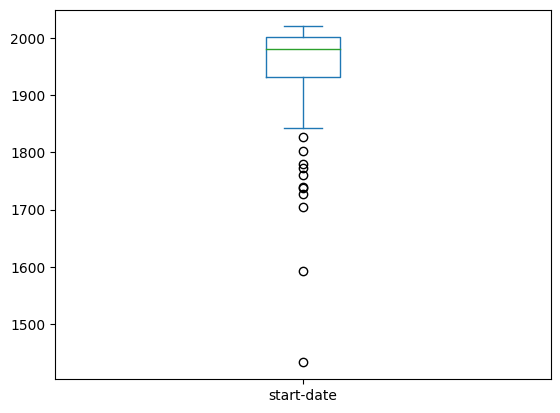

In [56]:
def convertDate(x):
  if x["begin"] :
    # return int(x["begin"][:4])
    return int(x["begin"][:4]) if x["begin"][:4].isnumeric() else None

mbdf["start-date"] = mbdf["life-span"].apply(convertDate)
mbdf["start-date"].plot(kind="box")

### Réduire la DataFrame et index

Réduisez la DataFrame au colonnes `sort-name`, `name`, `gender`, `genre`, `disambiguation`, `country`, `start-date` et faites de `sort-name` son index. Sauvez le résultat dans un fichier csv.

In [64]:
# votre code ici
mbdf[["sort-name", "name", "gender", "genre", "disambiguation", "country", "start-date"]].set_index("sort-name")

,name,gender,genre,disambiguation,country,start-date
sort-name,,,,,,
"Boum Bomo's, Les",Les Boum Bomo's,None,None,French parodic punk band,None,NaN
"Aweduti, Romain",Romain Aweduti,None,None,,None,NaN
1st Round,1st Round,None,None,,None,NaN
Fractal Universe,Fractal Universe,None,death metal,,None,2013.0
Fuzzphorus,Fuzzphorus,None,desert rock,,None,2011.0
...,...,...,...,...,...,...
VFO89,VFO89,Male,None,"French-born, Brussels based techno DJ & producer",None,NaN
"Zuccaro, Olivier",Olivier Zuccaro,Male,None,,None,1980.0
"Vincent, David, et ses mutants",David Vincent et ses mutants,None,rock,French alternative rock band from Nancy,FR,2005.0


## Données de Wikidata

On va ici utiliser le point d'accès SPARQL de [wikidata](https://www.wikidata.org/wiki/Wikidata:Main_Page) pour obtenir d'autres infos sur des groupes de Nancy. Il nous faut d'abord assurez d'avoir la librairie `SPARQLWrapper` installée. Dans Google Colab, cela peut être réalisé avec la commande
```
!pip install SPARQLWrapper
```

In [14]:
!pip install SPARQLWrapper

Defaulting to user installation because normal site-packages is not writeable


La requête SPARQL ci-dessous obtient des informations sur le nom de l'artiste (`artLabel`), son sexe (`genderLabel`), la date de début de carrière (`startdate`), l'instrument joué (`instLabel`), le genre (`genreLabel`) et le "label" qui le/la représente (`labelLabel`) pour des musiciens ou des groupes ayant une relation avec la ville de Nancy.

In [44]:
wdquery="""
SELECT distinct ?art ?artLabel ?genderLabel ?startdate ?instLabel ?genreLabel ?labelLabel
WHERE
{
  {?art wdt:P106 ?occ.
  ?occ wdt:P31 wd:Q66715801.
  ?art ?p wd:Q40898.
  optional{?art wdt:P21 ?gender.}
  optional {?art wdt:P1303 ?inst}.
  optional {?art wdt:P136 ?genre}.
  optional {?art wdt:P264 ?label}.
  optional {?art wdt:P2031 ?startdate}.
   } union {
  ?art wdt:P31 wd:Q215380.
  ?art ?p wd:Q40898.
  optional {?art wdt:P21 ?gender.}
  optional {?art wdt:P1303 ?inst}.
  optional {?art wdt:P136 ?genre}.
  optional {?art wdt:P264 ?label}.
  optional {?art wdt:P2031 ?startdate}.
    }
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}"""

In [45]:
wdquery

'\nSELECT distinct ?art ?artLabel ?genderLabel ?startdate ?instLabel ?genreLabel ?labelLabel\nWHERE\n{\n  {?art wdt:P106 ?occ.\n  ?occ wdt:P31 wd:Q66715801.\n  ?art ?p wd:Q40898.\n  optional{?art wdt:P21 ?gender.}\n  optional {?art wdt:P1303 ?inst}.\n  optional {?art wdt:P136 ?genre}.\n  optional {?art wdt:P264 ?label}.\n  optional {?art wdt:P2031 ?startdate}.\n   } union {\n  ?art wdt:P31 wd:Q215380.\n  ?art ?p wd:Q40898.\n  optional {?art wdt:P21 ?gender.}\n  optional {?art wdt:P1303 ?inst}.\n  optional {?art wdt:P136 ?genre}.\n  optional {?art wdt:P264 ?label}.\n  optional {?art wdt:P2031 ?startdate}.\n    }\n  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }\n}'

Sachant que l'URL du point d'accès SPARQL de wikidata est
```
https://query.wikidata.org/sparql
```
Le code ci-dessous crée une DataFrame avec les résulats de cette requête et incluant les colonnes `name`, `gender`, `start`, `genre`, `instrument`, et `label`.

In [16]:
from SPARQLWrapper import SPARQLWrapper, JSON
import io
import pandas as pd

endpoint_url = "https://query.wikidata.org/sparql"
sparql = SPARQLWrapper(endpoint_url, agent="IDMC TdD TD1")
sparql.setQuery(wdquery)
sparql.setReturnFormat(JSON)
result = sparql.query().convert()
name = [ x["artLabel"]["value"] for x in result["results"]["bindings"]]
gender = [x["genderLabel"]["value"] if "genderLabel" in x else None for x in result["results"]["bindings"]]
sd = [x["startdate"]["value"] if "startdate" in x else None for x in result["results"]["bindings"]]
genre = [x["genreLabel"]["value"] if "genreLabel" in x else None for x in result["results"]["bindings"]]
instrument = [x["instLabel"]["value"] if "instLabel" in x else None for x in result["results"]["bindings"]]
label = [ x["labelLabel"]["value"] if "labelLabel" in x else None for x in result["results"]["bindings"]]
wddf = pd.DataFrame({"name": name, "gender": gender, "start": sd, "genre": genre, "instrument": instrument, "label": label})
wddf

,name,gender,start,genre,instrument,label
0,Marboss,male,None,electronic music,None,Musea
1,Lionel Florence,male,None,None,None,None
2,Charlélie Couture,male,None,French rock,harmonica,None
3,Josèphe Colle,female,None,None,None,None
4,Pierre Schaeffer,male,1942-01-01T00:00:00Z,musique concrète,None,None
...,...,...,...,...,...,...
78,Nicolas Signac,male,None,None,None,None
79,Charlélie Couture,male,None,blues rock,piano,None
80,Jean-Baptiste Michelot,male,None,None,piano,None
81,Guy Fallot,male,None,None,cello,None


Eplorez rapidement son contenu pour le comprendre.

In [61]:
# votre code ici
wddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        83 non-null     object
 1   gender      82 non-null     object
 2   start       7 non-null      object
 3   genre       29 non-null     object
 4   instrument  43 non-null     object
 5   label       8 non-null      object
dtypes: object(6)
memory usage: 4.0+ KB


### Année de début

La colonne `start` contient des dates entières. Créez une colone `start-date` ne contenant que l'année. Calculez les statistiques descriptives pour répondre aux mêmes questions que pour les données de MusicBrainz sur l'année de début.

In [62]:
# votre code ici
from datetime import datetime

wddf["start-date"] = wddf.start.apply(lambda x:datetime.strptime(x,"%Y-%m-%dT%H:%M:%SZ").year if x else None)
wddf["start-date"].value_counts()

1942.0    1
1971.0    1
2003.0    1
1988.0    1
2005.0    1
1980.0    1
1985.0    1
Name: start-date, dtype: int64

### Réduire la DataFrame
Réduisez la DataFrame aux colonnes `name`, `gender`, `start-date`, `genre`, `instrument`, `label` et sauvez le résultat dans un fichier csv.

In [68]:
# votre code ici
wddf[["name", "gender", "start-date", "genre", "instrument", "label"]]
wddf.to_csv("wddf.csv")
wddf

,name,gender,start,genre,instrument,label,start-date
0,Marboss,male,None,electronic music,None,Musea,NaN
1,Lionel Florence,male,None,None,None,None,NaN
2,Charlélie Couture,male,None,French rock,harmonica,None,NaN
3,Josèphe Colle,female,None,None,None,None,NaN
4,Pierre Schaeffer,male,1942-01-01T00:00:00Z,musique concrète,None,None,1942.0
...,...,...,...,...,...,...,...
78,Nicolas Signac,male,None,None,None,None,NaN
79,Charlélie Couture,male,None,blues rock,piano,None,NaN
80,Jean-Baptiste Michelot,male,None,None,piano,None,NaN
81,Guy Fallot,male,None,None,cello,None,NaN


## Intégration

Arrivé à ce point, vous devriez avoir deux DataFrames, une pour MusicBrainz et une pour wikidata, correspondant aux fishiers CSV [musicbrainz.csv](https://mdaquin.github.io/t/2324/TdD_TD3/musicbrainz.csv) et [wikidata.csv](https://mdaquin.github.io/t/2324/TdD_TD3/wikidata.csv).

Créez une nouvelle DataFrame par jointure interne de ce deux DataFrames sur la colonne `name`.

Si vous n'avez pas réussi les exercices précédents, re-créez d'abord les DataFrames en utlisant les fichiers CSV.


In [71]:
# votre code ici
mdf = pd.merge(mbdf,wddf, on="name" ,how="inner")
mdf

,sort-name,gender-id,ipis,isnis,end_area,begin-area,gender_x,type,name,type-id,...,gerne,year,start-date_x,genre_x,gender_y,start,genre_y,instrument,label,start-date_y
0,"Belyzel, Najoua",93452b5a-a947-30c8-934f-6a4056b151c2,[],[000000005521009X],None,"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",Female,Person,Najoua Belyzel,b6e035f4-3ce9-331c-97df-83397230b0df,...,None,1981.0,1981.0,None,female,2005-01-01T00:00:00Z,electro,voice,Scorpio Music,2005.0
1,"Fallot, Guy",36d3d30a-839d-3eda-8cb3-29be4384e4a9,[],[000000010028286X],"{'type': None, 'sort-name': 'Lausanne', 'disam...","{'name': 'Nancy', 'type-id': None, 'disambigua...",Male,Person,Guy Fallot,b6e035f4-3ce9-331c-97df-83397230b0df,...,None,1927.0,1927.0,None,male,None,None,cello,None,NaN
2,"Dalmorès, Charles",36d3d30a-839d-3eda-8cb3-29be4384e4a9,[],[0000000080831330],None,"{'type-id': None, 'name': 'Nancy', 'id': '2b7c...",Male,Person,Charles Dalmorès,b6e035f4-3ce9-331c-97df-83397230b0df,...,None,1871.0,1871.0,None,male,None,None,voice,None,NaN
3,"Bernard, Marie-Hélène",93452b5a-a947-30c8-934f-6a4056b151c2,[],[],None,"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",Female,Person,Marie-Hélène Bernard,b6e035f4-3ce9-331c-97df-83397230b0df,...,None,1953.0,1953.0,None,female,None,None,None,None,NaN
4,"Baudiot, Charles",36d3d30a-839d-3eda-8cb3-29be4384e4a9,[],[0000000073572940],"{'id': 'dc10c22b-e510-4006-8b7f-fecb4f36436e',...","{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",Male,Person,Charles Baudiot,b6e035f4-3ce9-331c-97df-83397230b0df,...,None,1773.0,1773.0,None,male,None,None,cello,None,NaN
5,"Couture, Charlélie",36d3d30a-839d-3eda-8cb3-29be4384e4a9,"[00058218179, 00087502857]",[0000000109192131],None,"{'type-id': None, 'name': 'Nancy', 'id': '2b7c...",Male,Person,Charlélie Couture,b6e035f4-3ce9-331c-97df-83397230b0df,...,None,1956.0,1956.0,None,male,None,French rock,harmonica,None,NaN
6,"Couture, Charlélie",36d3d30a-839d-3eda-8cb3-29be4384e4a9,"[00058218179, 00087502857]",[0000000109192131],None,"{'type-id': None, 'name': 'Nancy', 'id': '2b7c...",Male,Person,Charlélie Couture,b6e035f4-3ce9-331c-97df-83397230b0df,...,None,1956.0,1956.0,None,male,None,French rock,voice,None,NaN
7,"Couture, Charlélie",36d3d30a-839d-3eda-8cb3-29be4384e4a9,"[00058218179, 00087502857]",[0000000109192131],None,"{'type-id': None, 'name': 'Nancy', 'id': '2b7c...",Male,Person,Charlélie Couture,b6e035f4-3ce9-331c-97df-83397230b0df,...,None,1956.0,1956.0,None,male,None,blues rock,guitar,None,NaN
8,"Couture, Charlélie",36d3d30a-839d-3eda-8cb3-29be4384e4a9,"[00058218179, 00087502857]",[0000000109192131],None,"{'type-id': None, 'name': 'Nancy', 'id': '2b7c...",Male,Person,Charlélie Couture,b6e035f4-3ce9-331c-97df-83397230b0df,...,None,1956.0,1956.0,None,male,None,French rock,piano,None,NaN
9,"Couture, Charlélie",36d3d30a-839d-3eda-8cb3-29be4384e4a9,"[00058218179, 00087502857]",[0000000109192131],None,"{'type-id': None, 'name': 'Nancy', 'id': '2b7c...",Male,Person,Charlélie Couture,b6e035f4-3ce9-331c-97df-83397230b0df,...,None,1956.0,1956.0,None,male,None,blues rock,harmonica,None,NaN


Vous remarquerez que les colonnes communes (à part `name`) dans le deux DataFrames ont été rennomées. Par exemple la colonne `gender` de MusicBrainz est devenue `gender_x` (si la DataFrame pour MusicBrainz était la première dans la jointure) et celle de la DataFrame de wikidata est devenue `gender_y`.

Re-Créez une nouvelle colonne `gender` qui prend les valeurs de sexe provenant de MusicBrainz. Quelle est la propotions d'homme et de femmes dans cette DataFrame ?

In [73]:
# votre code ici
def func(x):
  if x.gender_x : return x.gender_x.lower()
  return x.gender_y.lower() if x.gender_y else None
mdf["gender"] = mdf.apply(func, axis=1)
mdf

,sort-name,gender-id,ipis,isnis,end_area,begin-area,gender_x,type,name,type-id,...,year,start-date_x,genre_x,gender_y,start,genre_y,instrument,label,start-date_y,gender
0,"Belyzel, Najoua",93452b5a-a947-30c8-934f-6a4056b151c2,[],[000000005521009X],None,"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",Female,Person,Najoua Belyzel,b6e035f4-3ce9-331c-97df-83397230b0df,...,1981.0,1981.0,None,female,2005-01-01T00:00:00Z,electro,voice,Scorpio Music,2005.0,female
1,"Fallot, Guy",36d3d30a-839d-3eda-8cb3-29be4384e4a9,[],[000000010028286X],"{'type': None, 'sort-name': 'Lausanne', 'disam...","{'name': 'Nancy', 'type-id': None, 'disambigua...",Male,Person,Guy Fallot,b6e035f4-3ce9-331c-97df-83397230b0df,...,1927.0,1927.0,None,male,None,None,cello,None,NaN,male
2,"Dalmorès, Charles",36d3d30a-839d-3eda-8cb3-29be4384e4a9,[],[0000000080831330],None,"{'type-id': None, 'name': 'Nancy', 'id': '2b7c...",Male,Person,Charles Dalmorès,b6e035f4-3ce9-331c-97df-83397230b0df,...,1871.0,1871.0,None,male,None,None,voice,None,NaN,male
3,"Bernard, Marie-Hélène",93452b5a-a947-30c8-934f-6a4056b151c2,[],[],None,"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",Female,Person,Marie-Hélène Bernard,b6e035f4-3ce9-331c-97df-83397230b0df,...,1953.0,1953.0,None,female,None,None,None,None,NaN,female
4,"Baudiot, Charles",36d3d30a-839d-3eda-8cb3-29be4384e4a9,[],[0000000073572940],"{'id': 'dc10c22b-e510-4006-8b7f-fecb4f36436e',...","{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",Male,Person,Charles Baudiot,b6e035f4-3ce9-331c-97df-83397230b0df,...,1773.0,1773.0,None,male,None,None,cello,None,NaN,male
5,"Couture, Charlélie",36d3d30a-839d-3eda-8cb3-29be4384e4a9,"[00058218179, 00087502857]",[0000000109192131],None,"{'type-id': None, 'name': 'Nancy', 'id': '2b7c...",Male,Person,Charlélie Couture,b6e035f4-3ce9-331c-97df-83397230b0df,...,1956.0,1956.0,None,male,None,French rock,harmonica,None,NaN,male
6,"Couture, Charlélie",36d3d30a-839d-3eda-8cb3-29be4384e4a9,"[00058218179, 00087502857]",[0000000109192131],None,"{'type-id': None, 'name': 'Nancy', 'id': '2b7c...",Male,Person,Charlélie Couture,b6e035f4-3ce9-331c-97df-83397230b0df,...,1956.0,1956.0,None,male,None,French rock,voice,None,NaN,male
7,"Couture, Charlélie",36d3d30a-839d-3eda-8cb3-29be4384e4a9,"[00058218179, 00087502857]",[0000000109192131],None,"{'type-id': None, 'name': 'Nancy', 'id': '2b7c...",Male,Person,Charlélie Couture,b6e035f4-3ce9-331c-97df-83397230b0df,...,1956.0,1956.0,None,male,None,blues rock,guitar,None,NaN,male
8,"Couture, Charlélie",36d3d30a-839d-3eda-8cb3-29be4384e4a9,"[00058218179, 00087502857]",[0000000109192131],None,"{'type-id': None, 'name': 'Nancy', 'id': '2b7c...",Male,Person,Charlélie Couture,b6e035f4-3ce9-331c-97df-83397230b0df,...,1956.0,1956.0,None,male,None,French rock,piano,None,NaN,male
9,"Couture, Charlélie",36d3d30a-839d-3eda-8cb3-29be4384e4a9,"[00058218179, 00087502857]",[0000000109192131],None,"{'type-id': None, 'name': 'Nancy', 'id': '2b7c...",Male,Person,Charlélie Couture,b6e035f4-3ce9-331c-97df-83397230b0df,...,1956.0,1956.0,None,male,None,blues rock,harmonica,None,NaN,male


De même les colonnes `genre` ont été renommées en `genre_x` et `genre_y`.

Calculez les proportions de rangées dans la DataFrame de jointure pour lesquelles les deux colonnes "genres" ont une valeur, par rapport à toutes celles pour lesquelles la colonne `gender_x` a une valeur et à toutes celles pour lesquelles la colonne `gender_y` a une valeur.

Re-créez une nouvelle colonne `genre` qui prend sa valeur dans `genre_y` si elle existe, et sinon dans `genre_x`.

In [75]:
p1 = len(mdf[(mdf["genre_x"].notnull()) & (mdf["genre_y"].notnull())])/len(mdf[mdf["genre_y"].notnull()])
p2 = len(mdf[(mdf["genre_x"].notnull()) & (mdf["genre_y"].notnull())])/len(mdf[mdf["genre_x"].notnull()])
print("proportion de y avec un genre pour lesquel x en a un aussi",p1)
print("proportion de x avec un genre pour lesquel y en a un aussi",p2)

def onlyX(x):
  if x["genre_y"]!=None: return x["genre_y"]
  return x["genre_x"]

mdf["genre"] = mdf.apply(onlyX, axis=1)
len(mdf[mdf["genre"].notnull()])
mdf

proportion de y avec un genre pour lesquel x en a un aussi 0.23809523809523808
proportion de x avec un genre pour lesquel y en a un aussi 0.7142857142857143


,sort-name,gender-id,ipis,isnis,end_area,begin-area,gender_x,type,name,type-id,...,start-date_x,genre_x,gender_y,start,genre_y,instrument,label,start-date_y,gender,genre
0,"Belyzel, Najoua",93452b5a-a947-30c8-934f-6a4056b151c2,[],[000000005521009X],None,"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",Female,Person,Najoua Belyzel,b6e035f4-3ce9-331c-97df-83397230b0df,...,1981.0,None,female,2005-01-01T00:00:00Z,electro,voice,Scorpio Music,2005.0,female,electro
1,"Fallot, Guy",36d3d30a-839d-3eda-8cb3-29be4384e4a9,[],[000000010028286X],"{'type': None, 'sort-name': 'Lausanne', 'disam...","{'name': 'Nancy', 'type-id': None, 'disambigua...",Male,Person,Guy Fallot,b6e035f4-3ce9-331c-97df-83397230b0df,...,1927.0,None,male,None,None,cello,None,NaN,male,None
2,"Dalmorès, Charles",36d3d30a-839d-3eda-8cb3-29be4384e4a9,[],[0000000080831330],None,"{'type-id': None, 'name': 'Nancy', 'id': '2b7c...",Male,Person,Charles Dalmorès,b6e035f4-3ce9-331c-97df-83397230b0df,...,1871.0,None,male,None,None,voice,None,NaN,male,None
3,"Bernard, Marie-Hélène",93452b5a-a947-30c8-934f-6a4056b151c2,[],[],None,"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",Female,Person,Marie-Hélène Bernard,b6e035f4-3ce9-331c-97df-83397230b0df,...,1953.0,None,female,None,None,None,None,NaN,female,None
4,"Baudiot, Charles",36d3d30a-839d-3eda-8cb3-29be4384e4a9,[],[0000000073572940],"{'id': 'dc10c22b-e510-4006-8b7f-fecb4f36436e',...","{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",Male,Person,Charles Baudiot,b6e035f4-3ce9-331c-97df-83397230b0df,...,1773.0,None,male,None,None,cello,None,NaN,male,None
5,"Couture, Charlélie",36d3d30a-839d-3eda-8cb3-29be4384e4a9,"[00058218179, 00087502857]",[0000000109192131],None,"{'type-id': None, 'name': 'Nancy', 'id': '2b7c...",Male,Person,Charlélie Couture,b6e035f4-3ce9-331c-97df-83397230b0df,...,1956.0,None,male,None,French rock,harmonica,None,NaN,male,French rock
6,"Couture, Charlélie",36d3d30a-839d-3eda-8cb3-29be4384e4a9,"[00058218179, 00087502857]",[0000000109192131],None,"{'type-id': None, 'name': 'Nancy', 'id': '2b7c...",Male,Person,Charlélie Couture,b6e035f4-3ce9-331c-97df-83397230b0df,...,1956.0,None,male,None,French rock,voice,None,NaN,male,French rock
7,"Couture, Charlélie",36d3d30a-839d-3eda-8cb3-29be4384e4a9,"[00058218179, 00087502857]",[0000000109192131],None,"{'type-id': None, 'name': 'Nancy', 'id': '2b7c...",Male,Person,Charlélie Couture,b6e035f4-3ce9-331c-97df-83397230b0df,...,1956.0,None,male,None,blues rock,guitar,None,NaN,male,blues rock
8,"Couture, Charlélie",36d3d30a-839d-3eda-8cb3-29be4384e4a9,"[00058218179, 00087502857]",[0000000109192131],None,"{'type-id': None, 'name': 'Nancy', 'id': '2b7c...",Male,Person,Charlélie Couture,b6e035f4-3ce9-331c-97df-83397230b0df,...,1956.0,None,male,None,French rock,piano,None,NaN,male,French rock
9,"Couture, Charlélie",36d3d30a-839d-3eda-8cb3-29be4384e4a9,"[00058218179, 00087502857]",[0000000109192131],None,"{'type-id': None, 'name': 'Nancy', 'id': '2b7c...",Male,Person,Charlélie Couture,b6e035f4-3ce9-331c-97df-83397230b0df,...,1956.0,None,male,None,blues rock,harmonica,None,NaN,male,blues rock


Re-créez une colonne `start-date` prennant ses valeurs dans `start-date_x` et réduisez la DataFrame aux colonnes `name`, `gender`, `genre`, `country`, `start-date`, `instrument` et `label`.

Sauvez la DataFrame dans un ficher CSV.

In [ ]:
# votre code ici

# Nettoyage

La dataframe ci-dessus n'est pas super propre. Par exemple, le même artiste peut apparaitre plusieurs fois. Combien de fois cela arrive t'il ? Quelle est la proportion d'artiste dont le nom est dupliqué dans la dataframe ?

Créez une nouvelle DataFrame (une nouvelle variable) qui ne conserve qu'un seul des artites dont le nom est dupliqué et mettre le nom de l'artiste en index de cette nouvelle dataframe.

In [76]:
# votre code ici
mdf.name.duplicated()
mdf

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22     True
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
Name: name, dtype: bool

Quelle est la colonne avec le plus de valeurs manquantes (`None` ou `NaN`) ?

<AxesSubplot:>

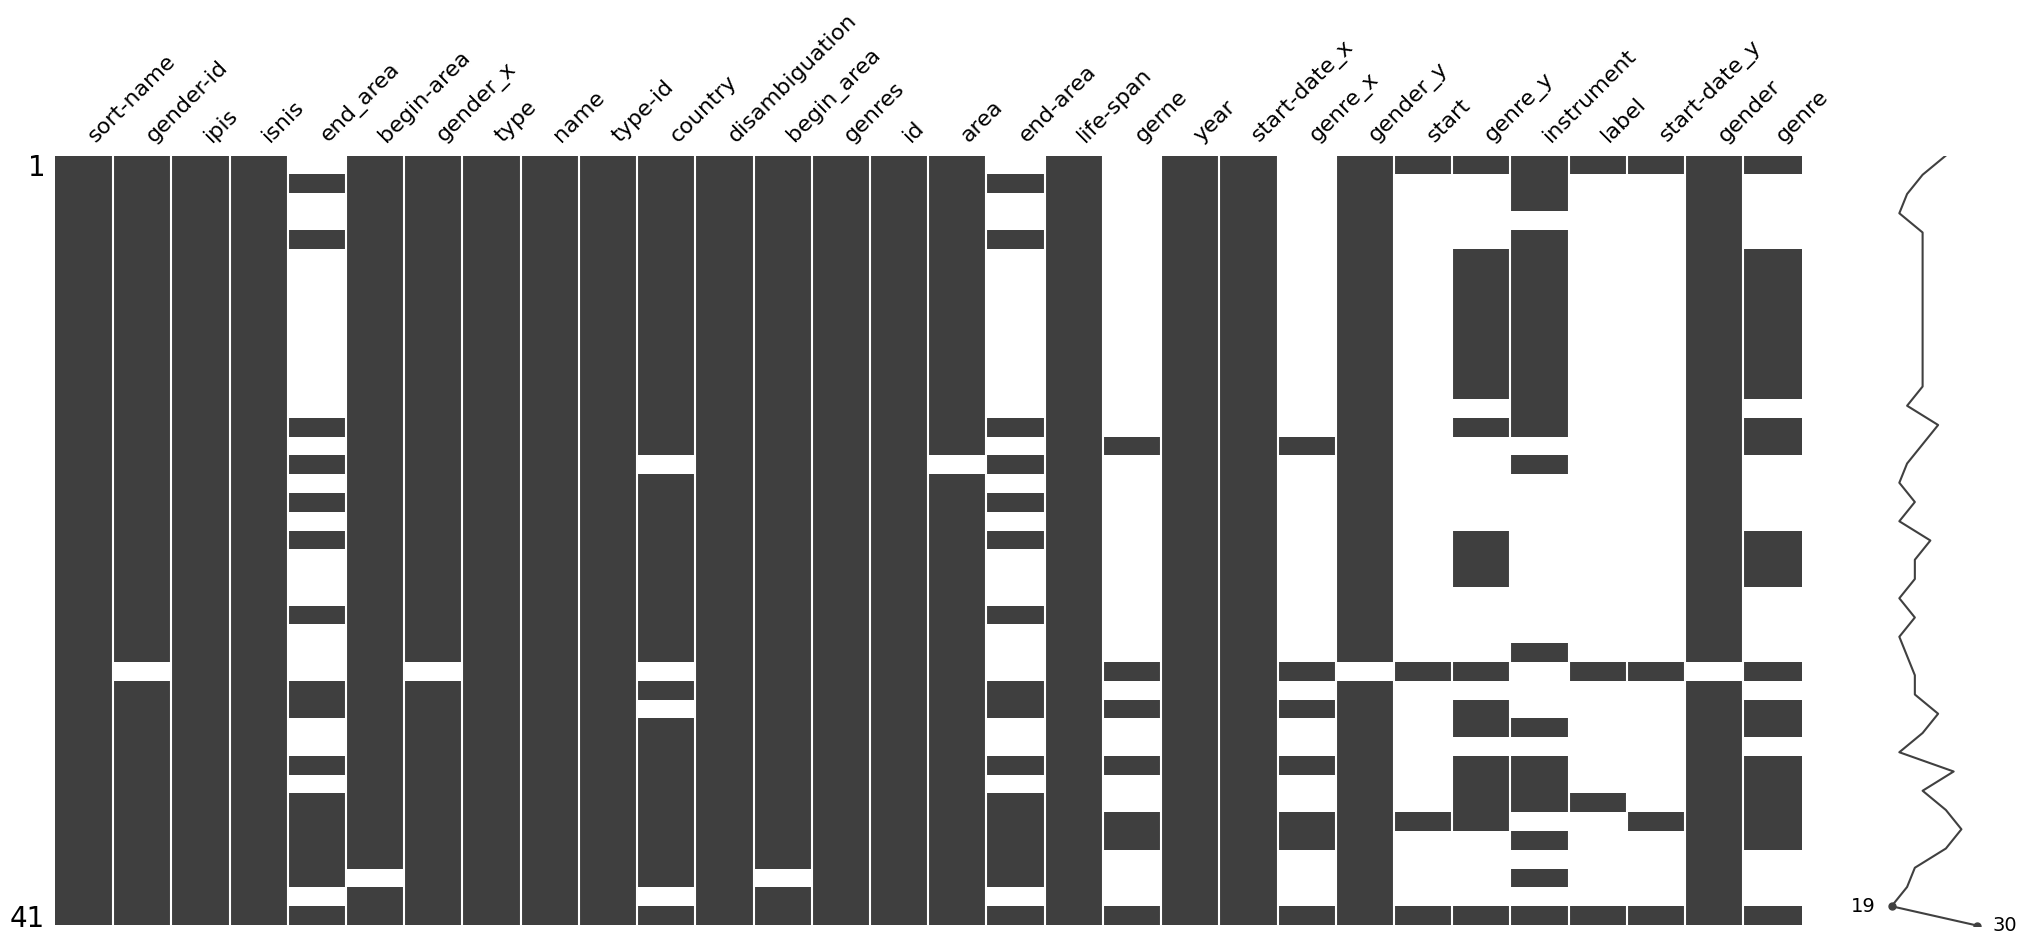

In [77]:
# votre code ici
import missingno as mno
mno.matrix(mdf)

Remplacez dans la colonne `genre` toutes les valeurs manquantes par la chaine de caractère "not specified".


In [90]:
# votre code ici
mdf["gerne"].fillna("not specified")

0              not specified
1              not specified
2              not specified
3              not specified
4              not specified
5              not specified
6              not specified
7              not specified
8              not specified
9              not specified
10             not specified
11             not specified
12             not specified
13             not specified
14             not specified
15                       pop
16             not specified
17             not specified
18             not specified
19             not specified
20             not specified
21             not specified
22             not specified
23             not specified
24             not specified
25             not specified
26             not specified
27                  coldwave
28             not specified
29    contemporary classical
30             not specified
31             not specified
32                 classical
33             not specified
34            

Il y a t'il des valeurs aberrantes dans la colonne `start-date` ? Et si on considère les valeurs à plus de deux écarts type de la moyenne ?

Remplacez ces valeurs par `NaN` (ce ne sont pas vraiment des valeurs abérrantes, mais on fait comme si).

In [89]:
sd = mdf["start-date_x"]

mdf[abs((sd-sd.mean())/sd.std())>2.5]

,sort-name,gender-id,ipis,isnis,end_area,begin-area,gender_x,type,name,type-id,...,start-date_x,genre_x,gender_y,start,genre_y,instrument,label,start-date_y,gender,genre
4,"Baudiot, Charles",36d3d30a-839d-3eda-8cb3-29be4384e4a9,[],[0000000073572940],"{'id': 'dc10c22b-e510-4006-8b7f-fecb4f36436e',...","{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",Male,Person,Charles Baudiot,b6e035f4-3ce9-331c-97df-83397230b0df,...,1773.0,None,male,None,None,cello,None,NaN,male,None
24,"Garaudé, Alexis de",36d3d30a-839d-3eda-8cb3-29be4384e4a9,[],[0000000080825539],"{'type-id': None, 'name': 'Paris', 'type': Non...","{'type-id': None, 'name': 'Nancy', 'id': '2b7c...",Male,Person,Alexis de Garaudé,b6e035f4-3ce9-331c-97df-83397230b0df,...,1779.0,None,male,None,None,None,None,NaN,male,None


Quels sont les valeurs les plus rares des autres colonnes que start-date ? Par quoi pourraient elle être remplacées ?

In [93]:
# votre code ici
# Sélectionnez uniquement les colonnes autres que start-date
other_columns = mdf.columns.difference(['start-date'])

# Parcourez chaque colonne autre que start-date
for column in other_columns:
      # Utilisez value_counts() pour compter les occurrences de chaque valeur
      value_counts = mdf[column].value_counts()

      # Trouvez la valeur la moins fréquente (la plus rare)
      rarest_value = value_counts.idxmin()

      # Affichez la valeur la plus rare pour cette colonne
      print(f"Colonne '{column}': La valeur la plus rare est '{rarest_value}' avec {value_counts.min()} occurrence(s).")


rarest_value

Colonne 'area': La valeur la plus rare est '{'sort-name': 'Nancy', 'type': None, 'name': 'Nancy', 'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c', 'type-id': None, 'disambiguation': ''}' avec 1 occurrence(s).
Colonne 'begin-area': La valeur la plus rare est '{'type-id': None, 'disambiguation': '', 'type': None, 'sort-name': 'Le Vésinet', 'name': 'Le Vésinet', 'id': '573a764c-c408-40cd-a630-001de47d33a7'}' avec 1 occurrence(s).
Colonne 'begin_area': La valeur la plus rare est '{'type-id': None, 'disambiguation': '', 'type': None, 'sort-name': 'Le Vésinet', 'name': 'Le Vésinet', 'id': '573a764c-c408-40cd-a630-001de47d33a7'}' avec 1 occurrence(s).
Colonne 'country': La valeur la plus rare est 'DE' avec 1 occurrence(s).
Colonne 'disambiguation': La valeur la plus rare est 'cellist' avec 1 occurrence(s).
Colonne 'end-area': La valeur la plus rare est '{'type': None, 'sort-name': 'Lausanne', 'disambiguation': '', 'id': '33f49521-f754-43cf-8d7a-d9e336fe56e6', 'name': 'Lausanne', 'type-id': None}

1929.0

La fonction `cut` permet de discretiser des valeurs numériques, c'est à dire de les grouper dans un petit nombre d'intervalles (on vera ça au prochain cours). Le code ci-dessous créer une discrétisation de la colonne `start-date` et l'affiche. (remplacer le nom de la dataframe créée, chez moi `fim_r`, par la votre).

Utiliser la méthode de la moyenne glissante pour afficher le même graphique, mais lissé pour montrer des tendances générales, plutôt que des variations locales.

<AxesSubplot:>

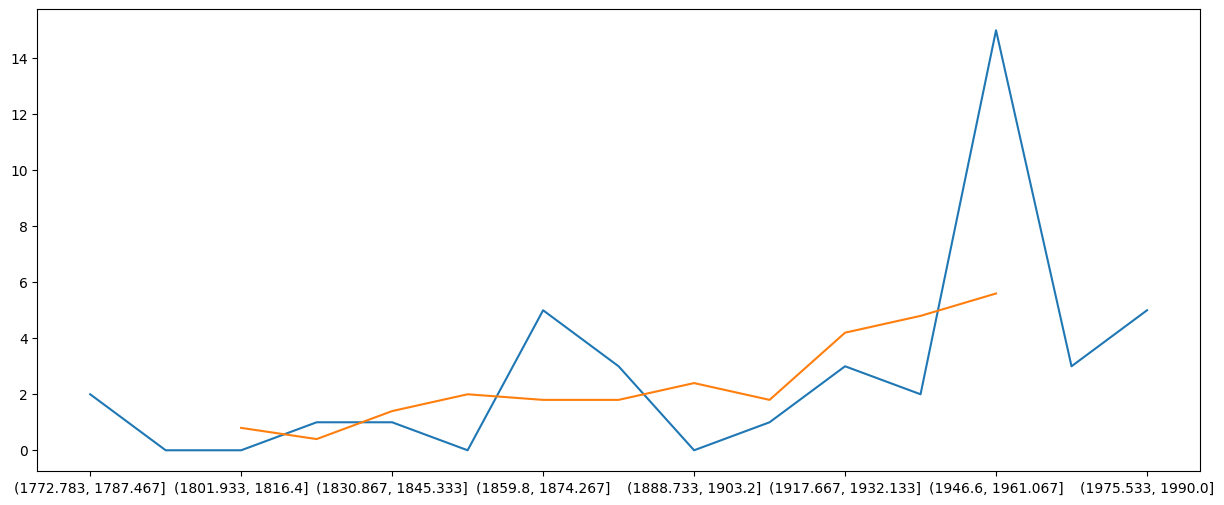

In [84]:
thedf = mdf
ddates = pd.cut(thedf.sort_values("start-date_x")["start-date_x"], 15)
ddates.value_counts().sort_index().plot(figsize=(15,6))
# ddates.value_counts().sort_index().rolling(5, center=True).mean()
ddates.value_counts().sort_index().rolling(5, center=True).mean().plot(figsize=(15,6))

In [ ]:
# votre code ici